# Workshop 3: Modelling and Simulation

## Introduction

What is model, what is a simulation? How does it fit into the scientific method?

## Exponential Growth [from Khan Academy]
Bacteria grown in the lab provide an excellent example of exponential growth. In exponential growth, the population’s growth rate increases over time, in proportion to the size of the population.
Let’s take a look at how this works. Bacteria reproduce by binary fission (splitting in half), and the time between divisions is about an hour for many bacterial species. To see how this exponential growth, let's start by placing 100010001000 bacteria in a flask with an unlimited supply of nutrients.
After 111 hour: Each bacterium will divide, yielding 200020002000 bacteria (an increase of 100010001000 bacteria).
After 222 hours: Each of the 200020002000 bacteria will divide, producing 400040004000 (an increase of 200020002000 bacteria).
After 333 hours: Each of the 400040004000 bacteria will divide, producing 800080008000 (an increase of 400040004000 bacteria).
The key concept of exponential growth is that the population growth rate —the number of organisms added in each generation—increases as the population gets larger. And the results can be dramatic: after 111 day (242424 cycles of division), our bacterial population would have grown from 100010001000 to over 161616 billion!


|Species|r|0|1|2|3|4|5|6|
|---|---|---|---|---|---|---|---|---|
|X|1.1|1|2|3|4|5|5|6|
|Y|.1|2|2|3|4|4|4|4|

## Modelling exponential growth

Suppose a population of bacteria doubles in size every hour. Then we can model the population using the following equation:

$$x_{i+1} = x_i + rx_i $$

where $x_i$ is the population at hour $i$. The equation simply represents the fact that the population at hour $i+1$ is $r+1$ times the population at hour $i$.

Suppose that the initial population is exactly $1$ and we would like to simulate the population size for 12 hours.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

n_hours = 12
initial_population = 1
pop = np.zeros(n_hours)

pop[0] = initial_population
for i in range(n_hours - 1):
    pop[i + 1] = pop[i] + pop[i] * 2
    
print("Population of species X:", pop)

Population of species X: [1.00000e+00 3.00000e+00 9.00000e+00 2.70000e+01 8.10000e+01 2.43000e+02
 7.29000e+02 2.18700e+03 6.56100e+03 1.96830e+04 5.90490e+04 1.77147e+05]


NB Python uses *exponential notation* to express decimal numbers e.g. $2048 = 2.048 \times 10^3$ is expressed as `2.048e+03`.

> Use the code above to simulate the growth of a population Y

Using `plt.plot` we can visualise the population curve over the 12 hours:

Text(0.5, 1.0, 'Species X')

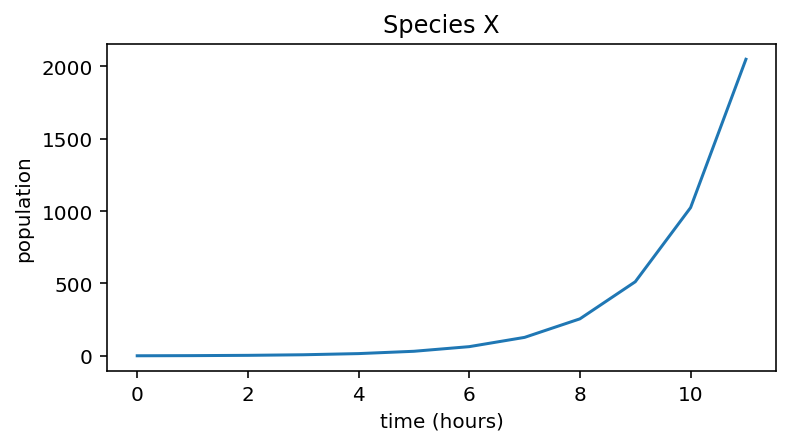

In [3]:
plt.figure(figsize=(6,3))
plt.plot(pop)

plt.xlabel("time (hours)")
plt.ylabel("population")
plt.title("Species X")

> Plot the predicted population of species Y

Below are the results of a laboratory experiment conducted in order to measure the growth in the two species of bacteria. The population of each was recorded every hour (if you are interested in how this might be performed in practice, see [here](https://courses.lumenlearning.com/boundless-microbiology/chapter/counting-bacteria/)).

|Species|0|1|2|3|4|5|6|
|---|---|---|---|---|---|---|---|
|X|1|2|3|4|5|5|6|
|Y|2|2|3|4|4|4|4|

Let's plot this experimental data on the same graph as the model simulation.



Text(0.5, 1.0, 'Species X')

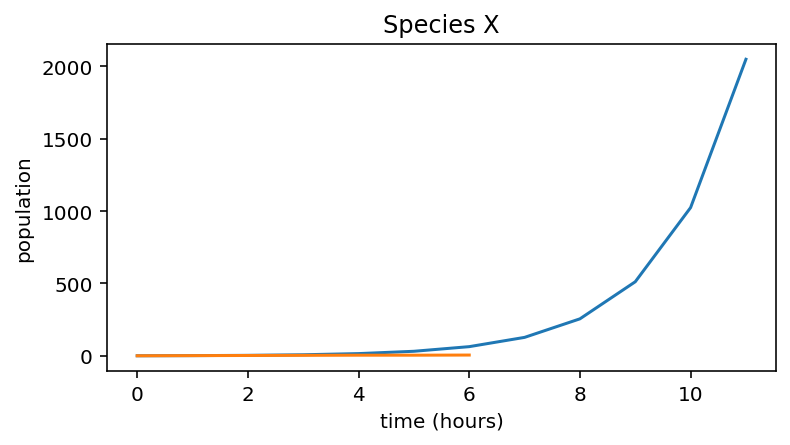

In [4]:
data_x = np.array([1, 2, 3, 4, 5, 5, 6])

plt.figure(figsize=(6,3))
plt.plot(pop)
plt.plot(data_x)

plt.xlabel("time (hours)")
plt.ylabel("population")
plt.title("Species X")

> Plot the experimental population data for species Y on the same graph as the module simulation for species Y.

The experimenter continues the experiment for a full 24 hours. The results of the two experiment are in the two files `data_exp_X.txt` and `data_exp_Y.txt`. We can use the `numpy` function `np.loadtxt` to load the data into a numpy array:

[1.44500000e+03 3.04598033e+03 7.05395090e+03 1.46223406e+04
 2.83395981e+04 5.99160544e+04 1.21477049e+05 2.33623379e+05
 4.97454637e+05 9.41374220e+05 1.92484952e+06 3.64943967e+06
 6.57174287e+06 9.16709186e+06 1.06635618e+07 9.49095615e+06
 9.55100436e+06 1.04547338e+07 9.89253974e+06 9.90477520e+06
 1.02613250e+07 9.30972719e+06 1.01668613e+07 1.02740221e+07]


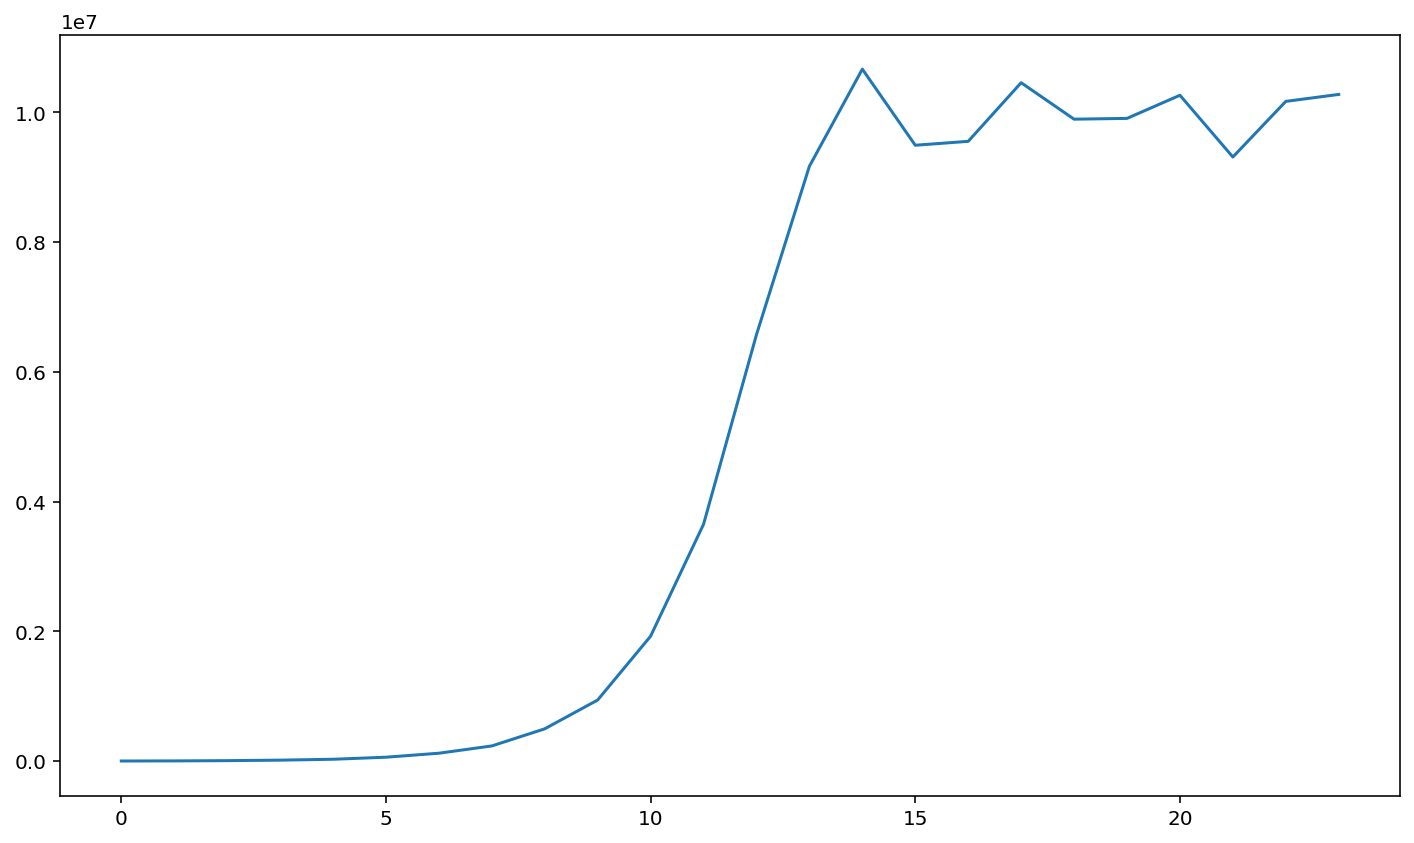

In [8]:
data_x = np.loadtxt("data_exp_X.txt")
print(data_x)


> Plot graphs for species for the two species, each containg the experimental and simulated populations for 24 hours.
> What do you notice? Does the model accurately predict the experiments?

You should have noticed that eventually the two populations stop increasing, likely due to exhausting resources such as nutrients or physical space. Our simple exponential model above is insufficient to take this into account.

Instead, we can consider a more sophisticated model, *logistic growth*.

$$x_{i+1} = x_i + r(1-x_i/K)x_i $$

the growth rate $r$ has been replaced by the term $r(1-x_i/K)$. For small populations (when $x_i$ is much less than $K$) the growth rate is close to $r$. As the population size approaches the value $K$, the growth rate reduces to zero.

> Adapt the simulation to use the new equation. You will need to create a new variable `K` and change the line `pop[i + 1] = pop[i] + pop[i] * 2`.
> Run the simulation for each species. You will need to choose an appropriate value of `K` for each.

## Exercise

In the folder `data` are text files containing results of 4 bacterial population growth experiments. For each one, plot the data and by running a simulation for each, estimate the value of $r$ and $K$. Which data file corresponds to which experiment?

**TODO: generate the data and check**